In [1]:
import numpy as np
import pandas as pd
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education','education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pickle import dump

In [3]:
train_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
test_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from xgboost.sklearn import XGBClassifier

In [24]:
cols=["age","workclass","fnlwgt","education","education_num","marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week","native_country","wage_class"]



In [25]:
train_set.isnull().sum()
   # no null values in any frame     #EDA

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

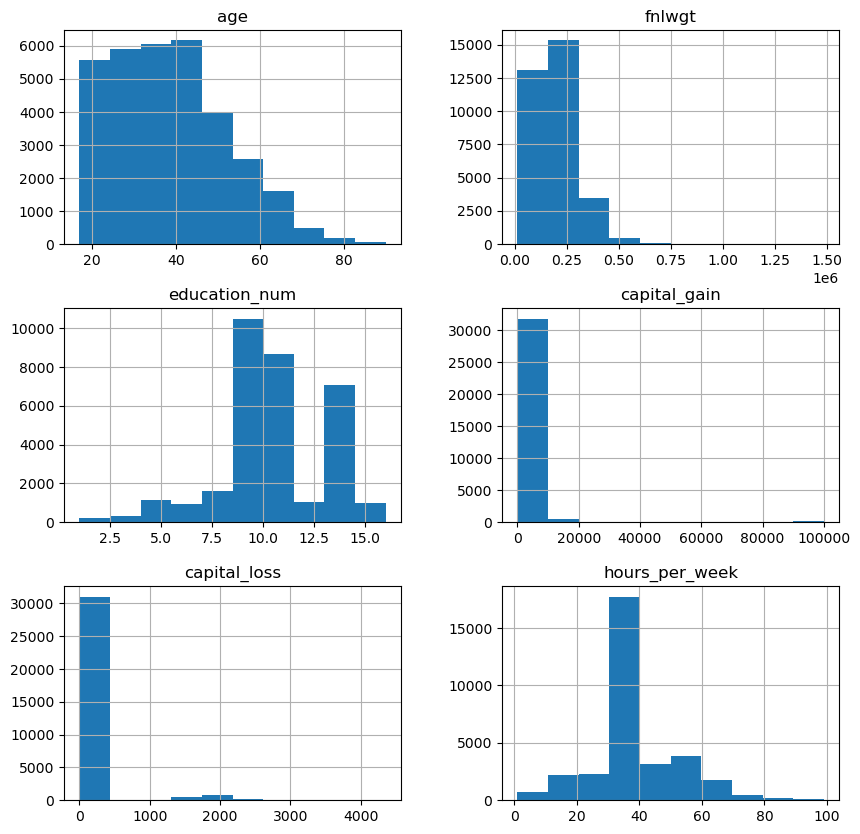

In [26]:
train_set.hist(figsize=(10,10))
plt.show()

In [27]:
train_set.dtypes  
#only 6 features(out of 14 are numeric)

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

In [28]:
train_set.workclass.value_counts()
#train_set.workclass.unique()       

# there is a '?'  need to be handle

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [29]:
for feature in cols:
    if train_set[feature].dtype == 'object':
        
        print('_'*10,feature, end=" ",)
        print('_'*10)
        print(train_set[feature].value_counts())
        

__________ workclass __________
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
__________ education __________
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
__________ marital_status __________
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name

In [30]:
train_set.columns  

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [31]:
import re
train_set.rename(columns=lambda name: re.sub(r"\-",'_',name), inplace=True) 

In [32]:
filter1 = train_set["workclass"]=="?"
#index= train_set.where(filter1).index
index = train_set[train_set["native_country"]== ' ?'].index
#index.value_counts()  # to display all the indexes having value '?'
index.value_counts().sum()  # sum of those indexes 
# type(index)

583

In [33]:
#now apply the filter for the '?' value in those above 3 columns

indexes_list = [] # will contain three index series of desired syntexes
def filter_questionMark(l):
    
    for item in l:
        print('_'*10,item, '_'*10)
        index = train_set[train_set[item]== ' ?'].index
        indexes_list.append(index)
        #index.value_counts()  # to display all the indexes having value '?'
        print("Total `?` in {0}: {1}".format(item, index.value_counts().sum()))  # sum of those indexes 
        print("Total % of `?` in {0}: {1}".format(item, round((index.value_counts().sum()/train_set.shape[0])*100,2)))
        
filter2= ['workclass','occupation', 'native_country']
filter_questionMark(filter2)

__________ workclass __________
Total `?` in workclass: 1836
Total % of `?` in workclass: 5.64
__________ occupation __________
Total `?` in occupation: 1843
Total % of `?` in occupation: 5.66
__________ native_country __________
Total `?` in native_country: 583
Total % of `?` in native_country: 1.79


In [34]:
print("Original Shape of Train Set:", train_set.shape)
print("Rows in Train Set:", train_set.shape[0])

Original Shape of Train Set: (32561, 15)
Rows in Train Set: 32561


In [35]:
print('\n Drowping `?` indexes from `workclass` featutre....')
train_set= train_set.drop(index)
print("Total New rows:",train_set.shape[0])


 Drowping `?` indexes from `workclass` featutre....
Total New rows: 31978


In [36]:
print('\n Drowping `?` indexes from `native_country` featutre....')
index1= train_set[train_set["native_country"]== ' ?'].index
train_set = train_set.drop(index1)
print("Total New rows:",train_set.shape[0])


 Drowping `?` indexes from `native_country` featutre....
Total New rows: 31978


In [37]:
print('\n Drowping `?` indexes from `occupation` featutre....')
index2 = train_set[train_set["occupation"]== ' ?'].index
train_set = train_set.drop(index2)
print("Total New rows:",train_set.shape[0])


 Drowping `?` indexes from `occupation` featutre....
Total New rows: 30162


In [38]:
# check for '?' again
filter_questionMark(filter2)

__________ workclass __________
Total `?` in workclass: 0
Total % of `?` in workclass: 0.0
__________ occupation __________
Total `?` in occupation: 0
Total % of `?` in occupation: 0.0
__________ native_country __________
Total `?` in native_country: 0
Total % of `?` in native_country: 0.0


Note: As XGBoost dnt support categorical data we need to use one hot coding tochange all object type features to numeric

Applying one hot coding to all the categorical variables

In [39]:
df1 = train_set.copy()

objectFeature = []
for i in list(df1.columns):
    if (df1[i].dtypes == 'object'):
        objectFeature.append(i)
        

df1=pd.get_dummies(df1[objectFeature[:-1]])

In [40]:
intFeature = []
for i in list(train_set.columns):
    if (train_set[i].dtypes == 'int64'):
        intFeature.append(i)

df2 = train_set[intFeature]

In [41]:
print(df1.shape)
print(df2.shape)

(30162, 98)
(30162, 6)


In [42]:
X_train = pd.concat([df1, df2], axis=1)#concatenation of two frames

In [43]:
X_train.shape   # final dataframe to be get Trained 

(30162, 104)

In [44]:
y=train_set[objectFeature[-1]]

Using LabelEncoder over the target variable

In [45]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# le.fit(y)
# le.classes_   # will display only two classes---> array([' <=50K', ' >50K'], dtype=object)y_train
y_train=le.fit_transform(y)

In [46]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [47]:
from xgboost.sklearn import XGBClassifier#applying xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [48]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': .5,
    'silent': True,    # would be boolean in sklearn
    'n_estimators': 100
}

In [49]:
x_train, x_test, y_t1, y_t2 =train_test_split(X_train, y_train, test_size=.25)
x_train.shape, x_test.shape, y_t1.shape, y_t2.shape

((22621, 104), (7541, 104), (22621,), (7541,))

In [50]:
#Model Training : making model 1

In [51]:
xgb = XGBClassifier(**params).fit(x_train,y_t1)
y_pred= xgb.predict(x_test)

[14:36:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



In [52]:
accuracy_score(y_t2, y_pred)

0.8677894178490916

In [53]:
#Making model no .2

In [54]:
eval_set = [(x_train,y_t1), (x_test, y_t2)]
xgb1 = XGBClassifier(**params).fit(x_train,y_t1,
                                   early_stopping_rounds=15, 
                                   eval_metric=["error", "logloss"], 
                                   eval_set=eval_set,
                                   verbose=True)

[14:37:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation_0-error:0.17687	validation_0-logloss:0.50737	validation_1-error:0.17252	validation_1-logloss:0.50609
[1]	validation_0-error:0.16034	validation_0-logloss:0.43533	validation_1-error:0.15794	validation_1-logloss:0.43564


C:\Users\91946\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91946\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-error:0.15879	validation_0-logloss:0.40072	validation_1-error:0.15993	validation_1-logloss:0.40360
[3]	validation_0-error:0.15278	validation_0-logloss:0.37731	validation_1-error:0.15502	validation_1-logloss:0.38064
[4]	validation_0-error:0.15371	validation_0-logloss:0.36262	validation_1-error:0.15608	validation_1-logloss:0.36687
[5]	validation_0-error:0.15428	validation_0-logloss:0.35152	validation_1-error:0.15754	validation_1-logloss:0.35731
[6]	validation_0-error:0.15119	validation_0-logloss:0.34384	validation_1-error:0.15422	validation_1-logloss:0.35082
[7]	validation_0-error:0.14999	validation_0-logloss:0.33590	validation_1-error:0.15595	validation_1-logloss:0.34357
[8]	validation_0-error:0.14907	validation_0-logloss:0.33069	validation_1-error:0.15568	validation_1-logloss:0.33800
[9]	validation_0-error:0.14805	validation_0-logloss:0.32694	validation_1-error:0.15475	validation_1-logloss:0.33488
[10]	validation_0-error:0.14659	validation_0-logloss:0.32241	validation_

In [55]:
y_pred1=xgb1.predict(x_test)

In [56]:
accuracy_score(y_t2, y_pred1)

0.8669937674048535

Ploting Classifying errors and log loss with respect to each iteration

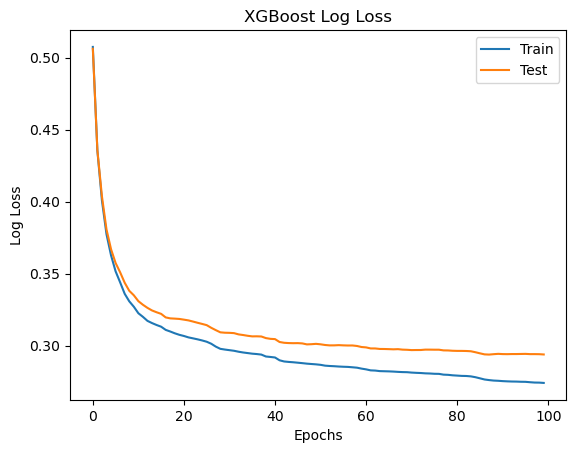

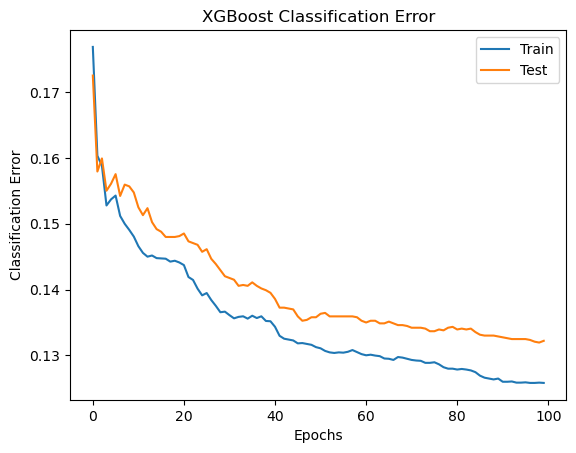

In [57]:
results = xgb1.evals_result()
epochs = len(results['validation_0']['error'])
x = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['logloss'], label='Train')
ax.plot(x, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.xlabel('Epochs')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['error'], label='Train')
ax.plot(x, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.xlabel('Epochs')
plt.title('XGBoost Classification Error')
plt.show()

In [58]:
#model no. 3

In [59]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 20,
    'learning_rate': .01,
    'silent': True,    # would be boolean in sklearn
    'n_estimators': 200
}

In [60]:
eval_set = [(x_train,y_t1), (x_test, y_t2)]
xgb1 = XGBClassifier(**params).fit(x_train,y_t1,
                                   early_stopping_rounds=15, 
                                   eval_metric=["error", "logloss"], 
                                   eval_set=eval_set,
                                   verbose=True)

C:\Users\91946\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91946\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14:39:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation_0-error:0.09977	validation_0-logloss:0.68639	validation_1-error:0.16112	validation_1-logloss:0.68717
[1]	validation_0-error:0.09832	validation_0-logloss:0.67983	validation_1-error:0.15833	validation_1-logloss:0.68131
[2]	validation_0-error:0.09863	validation_0-logloss:0.67340	validation_1-error:0.15807	validation_1-logloss:0.67559
[3]	validation_0-error:0.09929	validation_0-logloss:0.66709	validation_1-error:0.15714	validation_1-logloss:0.66997
[4]	validation_0-error:0.09977	validation_0-logloss:0.66089	validation_1-error:0.15767	validation_1-logloss:0.66446
[5]	validation_0-error:0.09893	validation_0-logloss:0.65479	validation_1-error:0.15820	validation_1-logloss:0.65907
[6]	validation_0-error:0.09929	validation_0-logloss:0.64878	validation_1-error:0.15794	validation_1-logloss:

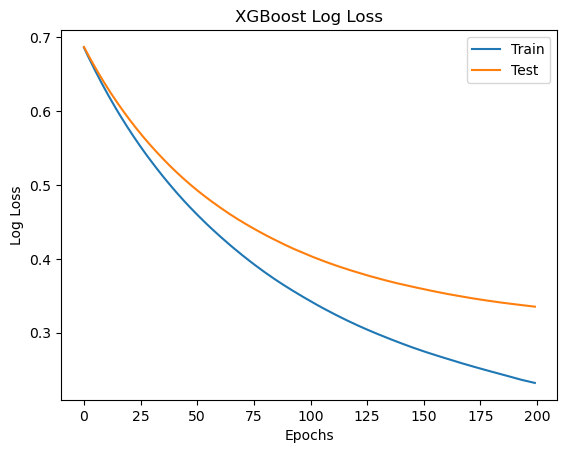

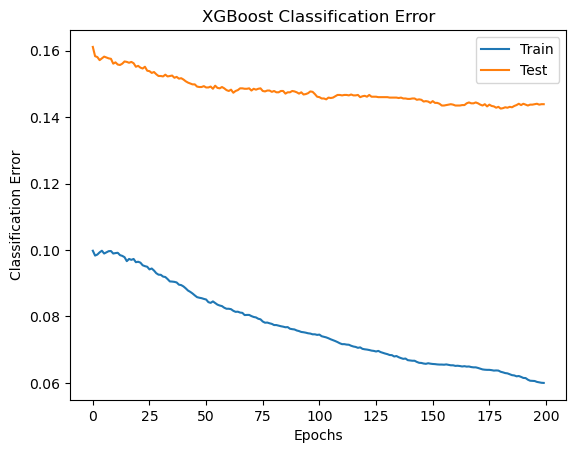

In [61]:
#plot
# retrieve performance metrics
results = xgb1.evals_result()
epochs = len(results['validation_0']['error'])
x = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['logloss'], label='Train')
ax.plot(x, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.xlabel('Epochs')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['error'], label='Train')
ax.plot(x, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.xlabel('Epochs')
plt.title('XGBoost Classification Error')
plt.show()

In [62]:
#The XGBoost way

import xgboost as xgb

In [63]:
dtrain = xgb.DMatrix(x_train, label = y_t1)
dtest = xgb.DMatrix(x_test, label = y_t2)
#creating watchlist of training
# to see out output 
watchlist = [(dtrain,'train'),(dtest, 'eval')]

In [64]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': True,    # would be boolean in sklearn
    'booster' : 'gbtree',
    'max_depth' : 7,
    'eval_metric' : 'auc'
}
# using bydeafault eta [default=0.3, alias: learning_rate]

num_rounds = 100  

In [65]:
model_xgb = xgb.train(params, dtrain, num_rounds, evals = watchlist, early_stopping_rounds = 15, verbose_eval = True)

[14:41:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-auc:0.90429	eval-auc:0.89868
[1]	train-auc:0.91751	eval-auc:0.90954
[2]	train-auc:0.92437	eval-auc:0.91243
[3]	train-auc:0.93170	eval-auc:0.91496
[4]	train-auc:0.93447	eval-auc:0.91535
[5]	train-auc:0.93731	eval-auc:0.91589
[6]	train-auc:0.94172	eval-auc:0.91766
[7]	train-auc:0.94273	eval-auc:0.91764
[8]	train-auc:0.94444	eval-auc:0.91952
[9]	train-auc:0.94518	eval-auc:0.92054
[10]	train-auc:0.94645	eval-auc:0.91993
[11]	train-auc:0.94754	eval-auc:0.91970
[12]	train-auc:0.95008	eval-auc:0.91871
[13]	train-auc:0.95267	eval-auc:0.91756
[14]	train-auc:0.95377	eval-auc:0.91727
[15]	train-auc:0.95451	eval-auc:0.91790
[16]	train-auc:0.95647	eval-auc:0.91685
[17]	train-auc:0.95777	eval-auc:0.91532
[18]	train-auc:0.95869	eval-auc:0.91526
[19]	train-auc:0.96053	eval-auc:0.91466
[20]	train-auc

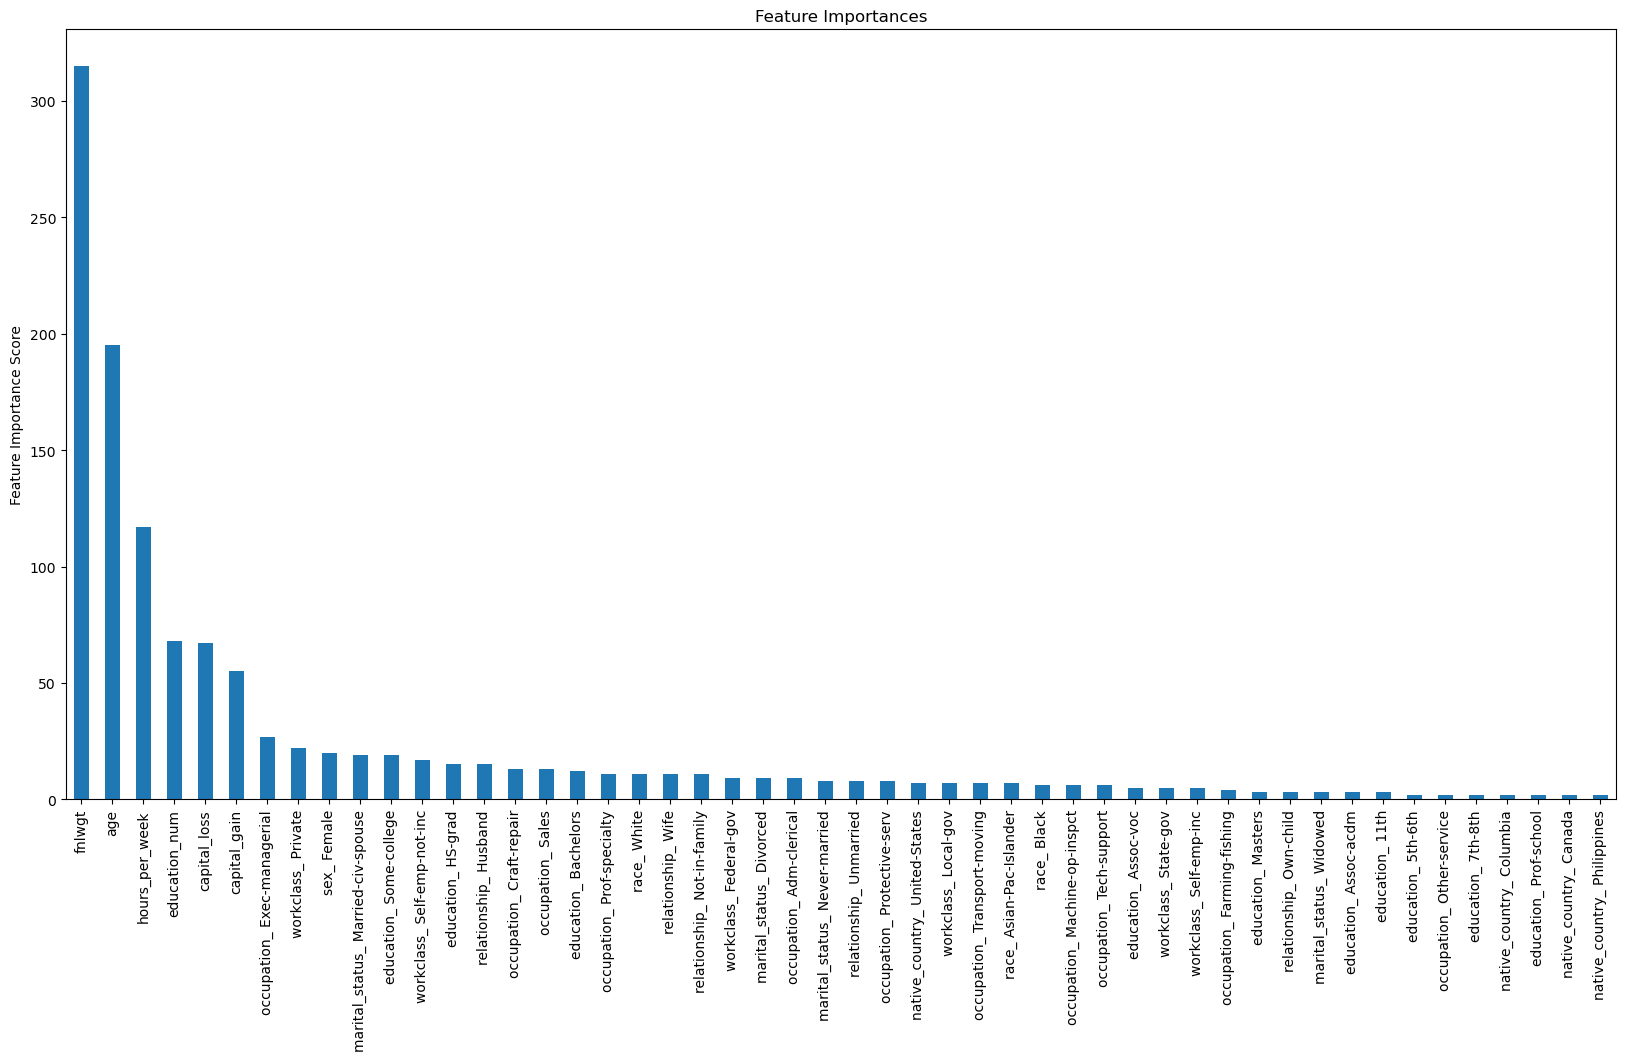

In [66]:
features_contribution = pd.Series(model_xgb.get_fscore()).sort_values(ascending=False)
plt.figure(figsize=(20,10))
features_contribution[:50].plot(kind='bar', title='Feature Importances')
#features_contribution[:50].plot(kind='line')
plt.ylabel('Feature Importance Score')
plt.show()